In [1]:
# 导入基本包
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs

In [13]:
# n_samples样本的个数
# n_features样本特征的个数
# centers决定了样本集分为几类
# cluster_std调整每一类样本点之间的欧氏距离，这个是一个标准房差，越大越离散
# 返回值为X，y 就是样本集和样本标签
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=2.0)

In [14]:
X.shape

(150, 2)

In [15]:
y

array([0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2,
       2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2,
       1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0])

In [16]:
sns.set(style="white")

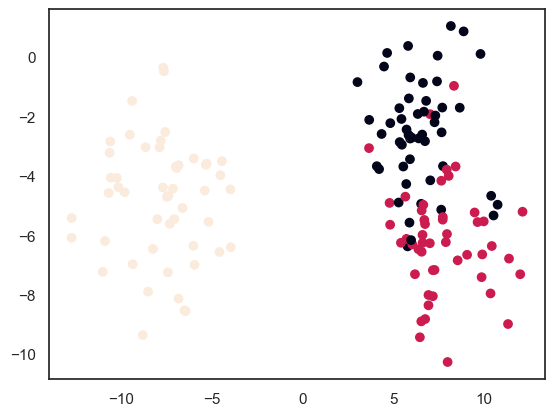

In [18]:
plt.scatter(X[:,0], X[:,1], c=y)

In [39]:
from matplotlib.colors import ListedColormap

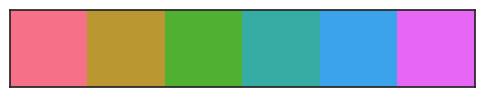

In [41]:
husl_colors = sns.color_palette('husl')
sns.palplot(husl_colors)

In [42]:
# 生成这个可以用作cmap参数的颜色映射
cm1 = ListedColormap(husl_colors[:3])
cm2 = ListedColormap(husl_colors[3:])

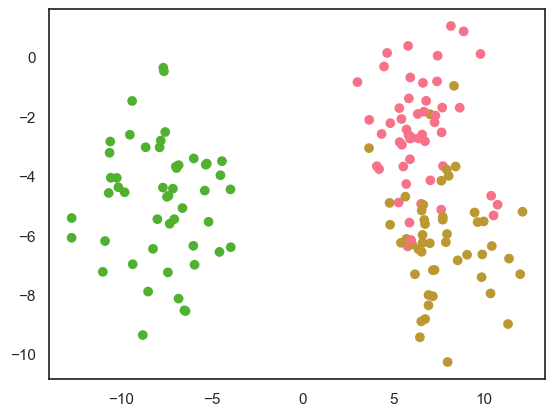

In [44]:
plt.scatter(X[:,0],X[:,1], c=y,cmap=cm1)

In [61]:
# 绘制分类边界，查看逻辑回归和KNN的分类效果
xmin, xmax = X[:,0].min()-0.5, X[:,0].max()+0.5
ymin, ymax = X[:,1].min()-0.5, X[:,1].max()+0.5

# 在横轴和纵轴获取网格的边界上点
a = np.linspace(xmin, xmax, 200)
b = np.linspace(ymin, ymax, 200)

# 网格交叉处理
xx, yy =np.meshgrid(a,b)


# 将xx，yy扁平化处理后及联，得到测试数据集（背景点）
# X_test = np.concatenate(xx.shape((-1,1)),yy.shape((-1,1)),axis=1)
X_test = np.c_[xx.ravel(), yy.ravel()]

In [62]:
X_test

array([[-13.24310398, -10.76880155],
       [-13.11311206, -10.76880155],
       [-12.98312015, -10.76880155],
       ...,
       [ 12.36530248,   1.54923674],
       [ 12.49529439,   1.54923674],
       [ 12.6252863 ,   1.54923674]])

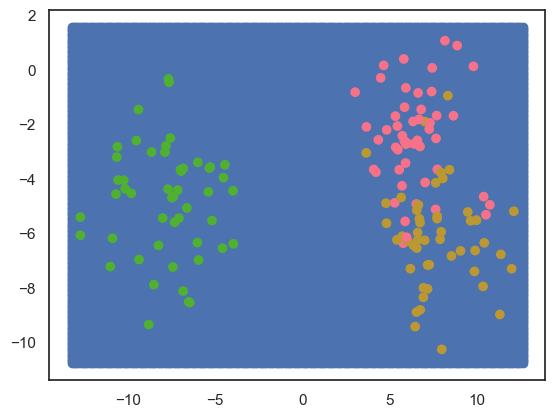

In [63]:
plt.scatter(X_test[:,0], X_test[:,1])
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm1)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [65]:
lr = LinearRegression()
knn = KNeighborsClassifier()

In [66]:
lr.fit(X, y)
knn.fit(X, y)

KNeighborsClassifier()

In [67]:
y1_ = lr.predict(X_test)
y2_ = knn.predict(X_test)

Text(0.5, 1.0, 'KNN')

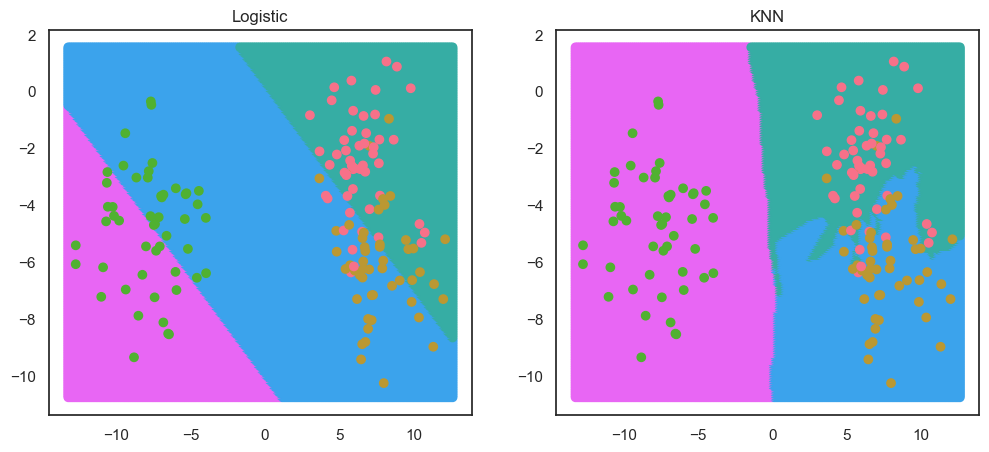

In [68]:
# 使用颜色预测结果标注背景点的颜色
plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y1_, cmap=cm2)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm1)
plt.title("Logistic")

ax2 = plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y2_, cmap=cm2)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm1)
plt.title("KNN")